### Compute O2 flux from BIO contribution
### BIO = SMS_O2 + O2sink (bottom) + O2flux (surface)  -------> SalishSea_oxy2

In [63]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

In [64]:
mycmap = copy.copy(cm.thermal)
mycmap.set_bad('darkgreen')

In [65]:
with xr.open_dataset('/ocean/atall/MOAD/grid/mesh_mask_202310b.nc') as mesh:
    tmask = mesh.tmask
    mbathy = mesh.mbathy
with xr.open_dataset('/ocean/atall/MOAD/Model/202410b/oxygen/01jan17/SalishSea_1d_20170101_20170101_diag_T.nc') as data:
    bio = data['BIO_O2'][0,0]
    sms = data['SMS_O2'][0,0]
O2flux=bio-sms

In [71]:
area = mesh.e1t[0] * mesh.e2t[0]

In [74]:
O2flux2=O2flux*area

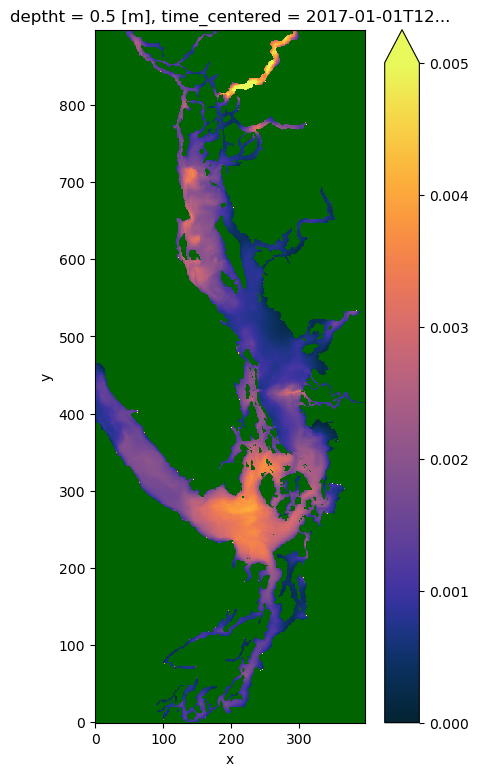

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
O2flux.where(tmask[0, 0] == 1).plot(ax=ax, vmin=0, vmax=0.005, cmap=mycmap)
viz_tools.set_aspect(ax);

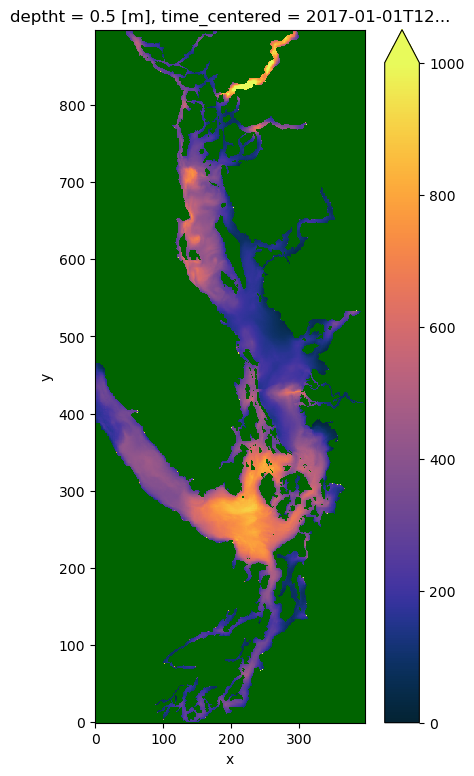

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
O2flux2.where(tmask[0, 0] == 1).plot(ax=ax, vmin=0, vmax=1000, cmap=mycmap)
viz_tools.set_aspect(ax);

In [81]:
print('Whole domaine')
print('O2_flux = ',np.array(np.sum(O2flux)),'mmol/m3/s')
print('O2_flux = ',np.array(np.sum(O2flux2)),'mmol/s over 1m tickness')

print('Juan de Fuca')
print('O2_flux = ',np.array(np.sum(O2flux[200:500,:250])),'mmol/m3/s')
print('O2_flux = ',np.array(np.sum(O2flux2[200:500,:250])),'mmol/s over 1m tickness')

print('Johnstone Strait')
print('O2_flux = ',np.array(np.sum(O2flux[720:,:200])),'mmol/m3/s')
print('O2_flux = ',np.array(np.sum(O2flux2[720,:200])),'mmol/s over 1m tickness')

Whole domaine
O2_flux =  130.72247 mmol/m3/s
O2_flux =  28408505.645467393 mmol/s over 1m tickness
Juan de Fuca
O2_flux =  49.506416 mmol/m3/s
O2_flux =  10972160.442415524 mmol/s over 1m tickness
Johnstone Strait
O2_flux =  7.173332 mmol/m3/s
O2_flux =  24017.653118022346 mmol/s over 1m tickness
